<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2 - Tensorflow

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)


def create_np_data(dataset):
    loader = DataLoader(dataset)
    images_list, labels_list = [], []

    for data in loader:
        images, labels = data
        images_list.append(images.numpy())
        labels_list.append(labels.numpy())

    data_array = np.reshape(np.concatenate(images_list), (60000, 28, 28))
    label_array = np.concatenate(labels_list)
    return data_array, label_array

(train_images, train_labels) = create_np_data(train_dataset)
(test_images, test_labels) = create_np_data(test_dataset)
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_onehot = tf.one_hot(train_labels, depth=10).numpy().astype(np.float32)
test_labels_onehot = tf.one_hot(test_labels, depth=10).numpy().astype(np.float32)


In [4]:
def show_data(data, labels):
    """
    This method shows some sample data with labels
    """
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx], labels[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

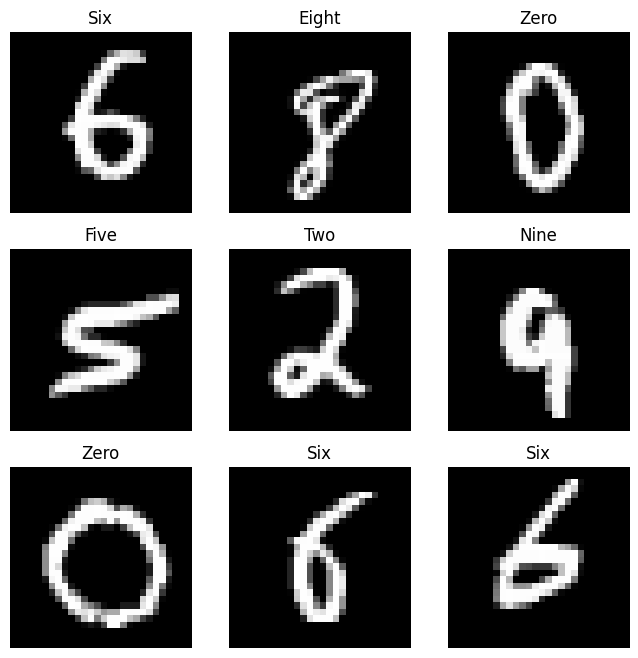

In [5]:
show_data(train_images, train_labels)

In [6]:
def train_tensorflow(X_train, y_train, model, loss, optimizer, metrics, epochs, verbose=0):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        X_train = training data
        y_train = training labels
        model = base model to train
        loss = loss function
        optmizer =  'adam' or 'SGD'
        metrics = which used to evaluate the model
        epocs  = number of iteration the moedls will be trained
        verbose = to control logs
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose)

    losses = history.history['loss']
    accuracies = history.history['accuracy']

    return model, losses[-1]

In [7]:
def evaluation(model, test_images, test_labels):
    """
    Evaluate the model with test data
    """
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    correct_predictions = np.sum(predicted_labels == test_labels)
    total_predictions = len(test_labels)
    accuracy = correct_predictions / total_predictions
    print(f'Accuracy on test set: {accuracy * 100 :.5}%')
    return accuracy

In [8]:
def show_sample_result(model, images, labels):
    """
    Show A sample test data and what is the actual and predicted labels
    """
    image, label = images[1], labels[1]
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    plt.title(f'Predicted Label: {predicted_labels[1]}, Actual Label: {label}')
    plt.axis('off')
    plt.show()

## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0342 - accuracy: 0.7675
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.8922
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0127 - accuracy: 0.9170
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step
Accuracy on test set: 92.668%
1875/1875 [==============================] - 6s 3ms/step


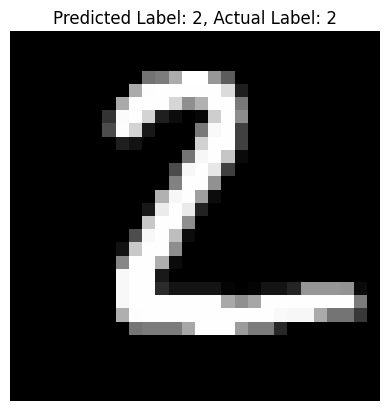

In [9]:
"""
Base Model Architecture
"""
model = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model, _ = train_tensorflow(train_images,
                            train_labels_onehot,
                            model,
                            loss = 'mse',
                            optimizer = 'adam',
                            metrics = ['accuracy'],
                            epochs=5,
                            verbose=1)

test_accuracy = evaluation(model, test_images, test_labels)
show_sample_result(model, test_images, test_labels)

## Step 4. Choose one of the proposed modifications below:

### 1 - Add another Dense layer of 128 nodes

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0300 - accuracy: 0.7882
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0160 - accuracy: 0.8954
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0130 - accuracy: 0.9147
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0109 - accuracy: 0.9285
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step
Accuracy on test set: 94.398%
1875/1875 [==============================] - 3s 2ms/step


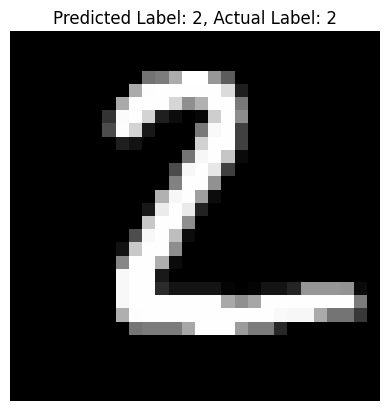

In [10]:
"""
Added a extra layer in the model
"""
model_extra_layer = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_extra_layer, _ = train_tensorflow(train_images,
                            train_labels_onehot,
                            model_extra_layer,
                            loss = 'mse',
                            optimizer = 'adam',
                            metrics = ['accuracy'],
                            epochs=5,
                            verbose=1)

test_accuracy_extra_layer = evaluation(model_extra_layer, test_images, test_labels)
show_sample_result(model_extra_layer, test_images, test_labels)

### Increase the current number of nodes in the layer to 256

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0292 - accuracy: 0.7965
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0148 - accuracy: 0.9040
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0127 - accuracy: 0.9181
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0111 - accuracy: 0.9277
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step
Accuracy on test set: 93.618%
1875/1875 [==============================] - 4s 2ms/step


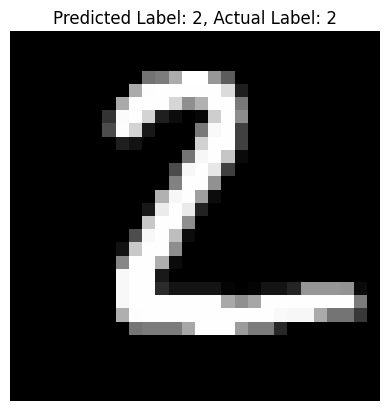

In [11]:
"""
Make a exisitng layer wide
"""
model_wide_layer = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(256, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_wide_layer, _ = train_tensorflow(train_images,
                                        train_labels_onehot,
                                        model_wide_layer,
                                        loss = 'mse',
                                        optimizer = 'adam',
                                        metrics = ['accuracy'],
                                        epochs=5,
                                        verbose=1)

test_accuracy_wide_layer = evaluation(model_wide_layer, test_images, test_labels)
show_sample_result(model_wide_layer, test_images, test_labels)

## Step 6. Report on the results of the modified model and if it matches your hypothesis

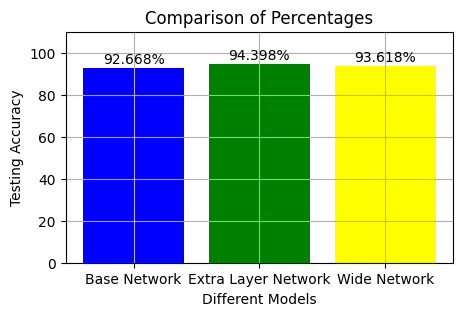

In [12]:
"""
Performance Comparisions for the differnet models
"""
labels = ['Base Network', 'Extra Layer Network', 'Wide Network']
values = [test_accuracy*100, test_accuracy_extra_layer*100, test_accuracy_wide_layer*100]

plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'yellow'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.title('Comparison of Percentages')
plt.xlabel('Different Models')
plt.ylabel('Testing Accuracy')
plt.grid(True)

# Show the plot
plt.show()

## Observation

    - From the bar chart its clear that all three models works great and achieving more than 92% test accuracy.
    - But we can also see that extra layer models works with best accuracy.
    - If we rerun the training it will change, so we need more epochs  for any conclusion.

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [13]:
"""
Defining a model class which have a variable dropout and activation functions.
So that we can measure the performance for each of the model
"""
def MLP_Flex(activation_function, dropout):
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation_function),
        layers.Dropout(dropout),
        layers.Dense(64, activation=activation_function),
        layers.Dropout(dropout),
        layers.Dense(10, activation=activation_function)
    ])

In [14]:
optimizers = ['adam', 'sgd', 'rmsprop']
loss_functions = ['mse', 'categorical_crossentropy']
dropouts = [0.0, 0.2, 0.5]
activation_functions = ['relu', 'sigmoid']

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer)
                result["loss"].append(loss_function)
                result["activation"].append(activation_function)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)

                model, training_loss = train_tensorflow(train_images,
                                                        train_labels_onehot,
                                                        model_wide_layer,
                                                        loss = loss_function,
                                                        optimizer = optimizer,
                                                        metrics = ['accuracy'],
                                                        epochs=5,
                                                        verbose=0)

                test_accuracy = evaluation(model, test_images, test_labels)

                result["training_loss"].append(training_loss)
                result["test_accuracy"].append(test_accuracy*100)



	Training optimizer=adam,loss=mse,activation=relu,dropout=0.0
1875/1875 [==============================] - 5s 2ms/step
Accuracy on test set: 95.968%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.0
1875/1875 [==============================] - 4s 2ms/step
Accuracy on test set: 96.655%

	Training optimizer=adam,loss=mse,activation=relu,dropout=0.2
1875/1875 [==============================] - 5s 3ms/step
Accuracy on test set: 97.022%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.2
1875/1875 [==============================] - 4s 2ms/step
Accuracy on test set: 97.332%

	Training optimizer=adam,loss=mse,activation=relu,dropout=0.5
1875/1875 [==============================] - 7s 4ms/step
Accuracy on test set: 97.32%

	Training optimizer=adam,loss=mse,activation=sigmoid,dropout=0.5
1875/1875 [==============================] - 5s 2ms/step
Accuracy on test set: 97.462%

	Training optimizer=adam,loss=categorical_crossentropy,activation=relu,dropout=0.0
1875/187

In [15]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,training_loss,test_accuracy,name
0,adam,mse,0.0,relu,0.005470,95.968333,"optimizer=adam,loss=mse,activation=relu,dropou..."
1,adam,mse,0.0,sigmoid,0.003714,96.655000,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
2,adam,mse,0.2,relu,0.002849,97.021667,"optimizer=adam,loss=mse,activation=relu,dropou..."
3,adam,mse,0.2,sigmoid,0.002196,97.331667,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
4,adam,mse,0.5,relu,0.001784,97.320000,"optimizer=adam,loss=mse,activation=relu,dropou..."
5,adam,mse,0.5,sigmoid,0.001468,97.461667,"optimizer=adam,loss=mse,activation=sigmoid,dro..."
6,adam,categorical_crossentropy,0.0,relu,0.027481,97.055000,"optimizer=adam,loss=categorical_crossentropy,a..."
7,adam,categorical_crossentropy,0.0,sigmoid,0.017762,97.706667,"optimizer=adam,loss=categorical_crossentropy,a..."
8,adam,categorical_crossentropy,0.2,relu,0.013197,97.481667,"optimizer=adam,loss=categorical_crossentropy,a..."
9,adam,categorical_crossentropy,0.2,sigmoid,0.009509,97.678333,"optimizer=adam,loss=categorical_crossentropy,a..."


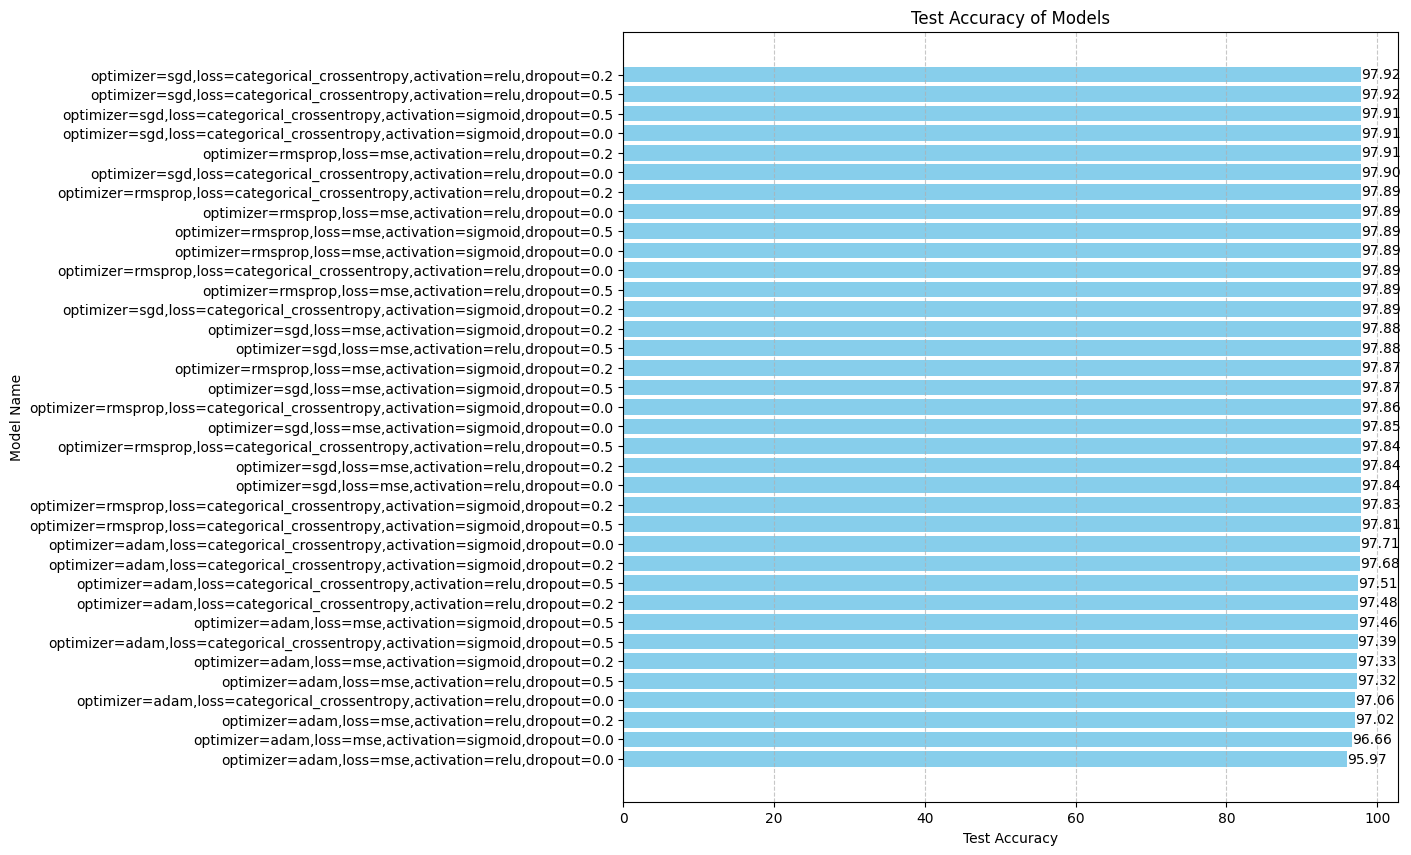

In [16]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='test_accuracy')

plt.figure(figsize=(10, 10))
bars = plt.barh(df_sorted['name'], df_sorted['test_accuracy'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## The overall all the hyper parameter combinations are performing well and all the models have similar performance.

## Observations -
    - We can see that most of hyper parameters are working as great and have accuracy very close to each other.
    - Increaseing value of dropout more than 0.2 is not helping.
    - RMS_Prop Optimizer is working consistently good, but Adam is not the best compare to Pytorch.
    - Categorical Cross Entropy Loss function is also working great for the given problem, becasue its a multi class classification problem.